<a href="https://colab.research.google.com/github/Jalicia-Harris/Drug-vs-Placebo-for-Cirrhosis/blob/main/Drug_vs_Placebo_for_Cirrhosis_Predictions_Jalicia_Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug vs Placebo for Cirrhosis Predictions

##### Jalicia Harris

###Data Dictionary:

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

## Import Libraries and Packages

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress  All Warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report)


## Load and Inspect Data

In [2]:
# Load and Display Data
df = pd.read_csv('/content/drive/MyDrive/Data/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
# Display column info and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### Display Number of Rows and Columns

In [4]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 418 rows and 20 columns


## Clean the Dataset

### Remove Unnecessary Columns

- The 'ID' column will not be useful for making predictions, so the column will be dropped.
- The 'Age' column contains way too many impossible values, so this will also be dropped.

In [5]:
# Remove unnecessary columns
df.drop(columns=['ID', 'Age'], inplace=True)
# Display columns to confirm change
df.columns

Index(['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

### Remove Unnecessary Rows

#### Identify Any Duplicates

In [6]:
# Display number of duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### Identify Any Missing Values

In [7]:
# Display total number of missing values
print(f'There are {df.isna().sum().sum()} missing values')

There are 1033 missing values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
dtypes: float64

In [9]:
# Check for missing values
df.isna().sum()

N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

- All missing values in categorical columns ('Drug', 'Ascites', 'Hepatomegaly', 'Spiders') will be filled in with 'Unknown' since there is no way of knowing what they are.
- All missing values in numeric columns ('Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage') will be filled with the average of each column. Dropping these columns would cause a lot of useful data to be removed.

### Correct All Missing Values

#### Categorical Columns

In [10]:
# Replace missing categorical values with 'Unknown'
df['Drug'].fillna('Non_Participant', inplace=True)
df['Ascites'].fillna('Non_Participant', inplace=True)
df['Hepatomegaly'].fillna('Non_Participant', inplace=True)
df['Spiders'].fillna('Non_participant', inplace=True)

#### Numeric Columns

In [11]:
# Replace missing numeric missing values with the mean
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['Copper'].fillna(df['Copper'].mean(), inplace=True)
df['Alk_Phos'].fillna(df['Alk_Phos'].mean(), inplace=True)
df['SGOT'].fillna(df['SGOT'].mean(), inplace=True)
df['Tryglicerides'].fillna(df['Tryglicerides'].mean(), inplace=True)
df['Platelets'].fillna(df['Platelets'].mean(), inplace=True)
df['Prothrombin'].fillna(df['Prothrombin'].mean(), inplace=True)
df['Stage'].fillna(df['Stage'].mean(), inplace=True)

In [12]:
# Confirm Results
df.isna().sum()

N_Days           0
Status           0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Identify Any Inconsistencies

#### Categorical Columns

In [13]:
# Check and address any inconsistent values in categorical columns.
df.describe(include='object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,418,418,418,418,418,418
unique,3,3,2,3,3,3,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [14]:
df['Status'].value_counts()

C     232
D     161
CL     25
Name: Status, dtype: int64

In [15]:
df['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Non_Participant    106
Name: Drug, dtype: int64

In [16]:
df['Ascites'].value_counts()

N                  288
Non_Participant    106
Y                   24
Name: Ascites, dtype: int64

In [17]:
df['Hepatomegaly'].value_counts()

Y                  160
N                  152
Non_Participant    106
Name: Hepatomegaly, dtype: int64

In [18]:
df['Spiders'].value_counts()

N                  222
Non_participant    106
Y                   90
Name: Spiders, dtype: int64

In [19]:
df['Edema'].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

- There are no inconsistencies in the categorical columns

#### Numeric Columns

In [20]:
# Check and address any inconsistencies in the numeric columns
df.describe(include='number').round(2)

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,1917.78,3.22,369.51,3.50,97.65,1982.66,122.56,124.70,257.02,10.73,3.02
std,1104.67,4.41,191.08,0.42,73.70,1848.44,48.97,53.48,97.02,1.02,0.88
min,41.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1092.75,0.80,273.00,3.24,51.25,1016.25,91.00,95.00,190.00,10.00,2.00
50%,1730.00,1.40,369.51,3.53,97.65,1717.00,122.56,124.70,253.00,10.60,3.00
75%,2613.50,3.40,369.51,3.77,100.75,1982.66,135.75,127.75,315.50,11.10,4.00
max,4795.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00,4.00


- There are impossible values found in the 'Stage' column.
- The impossible values will be replaced with the number '3' and datatype will be corrected to an integer.

In [21]:
df['Stage'].value_counts()

3.000000    155
4.000000    144
2.000000     92
1.000000     21
3.024272      6
Name: Stage, dtype: int64

In [22]:
# Correct column by changing datatype to an integer
df['Stage'] = df['Stage'].astype(int)
# Confirm charges
df['Stage'].value_counts()

3    161
4    144
2     92
1     21
Name: Stage, dtype: int64

## Explore Data Using Visualizations

### Univariate Visualizations

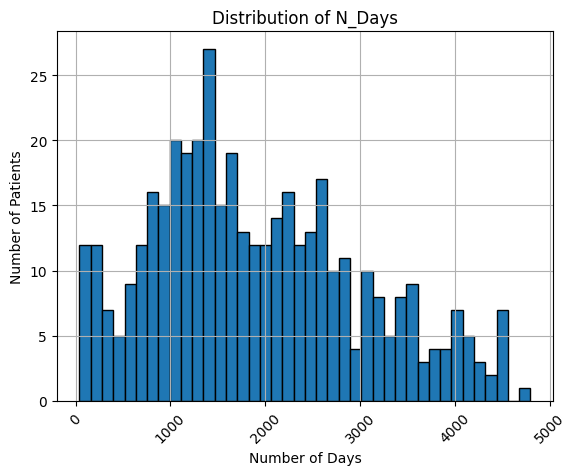

In [23]:
# Histogram to view the distributions of the 'Drug' column
ax = df['N_Days'].hist(bins=40, edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of N_Days')
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Patients');

- The histogram above displays the distribution of the number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986.

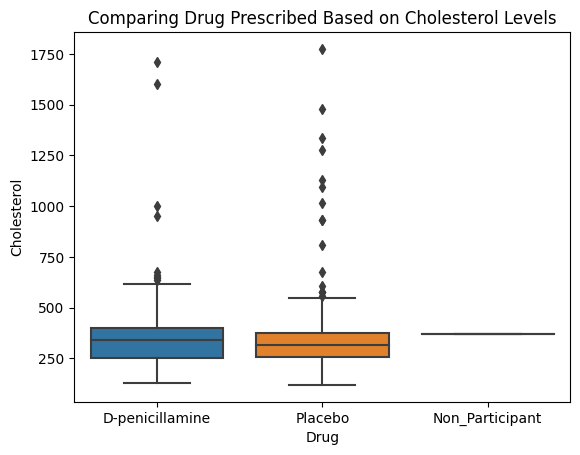

In [24]:
# Create a Boxplot to view statistical summaries of various features in the dataset
ax = sns.boxplot(x='Drug', y='Cholesterol', data=df)
ax.set_title("Comparing Drug Prescribed Based on Cholesterol Levels");

## Multivariate Visualizations

### Heatmap

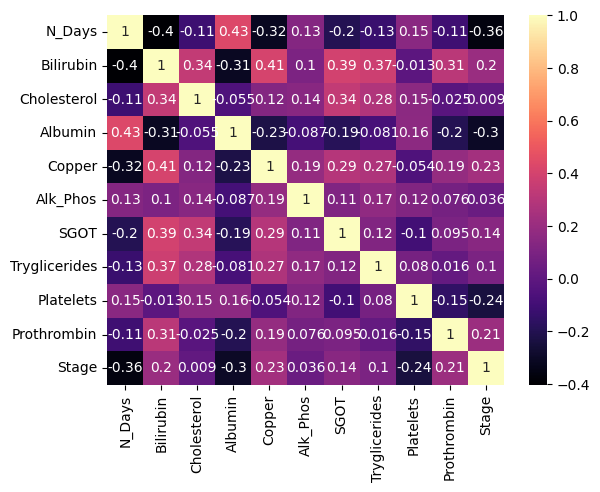

In [25]:
# Identify any strong or moderate correlations using heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'magma', annot=True);

#### Based off the heatmap above:
- Features with the strongest negative correlation are 'N_Days' and 'Bilirubin'. This makes sense considering bilirubin levels wouldn't really matter to the number of days a patient participated in the trial.

- Features with the strongest positive correlation are 'N_Days' and 'Albumin'. The data above shows that the albumin levels of the participants increased or decreased based the number of days they remained. The more days the patient remained in the trial, the higher their albumin levels were.


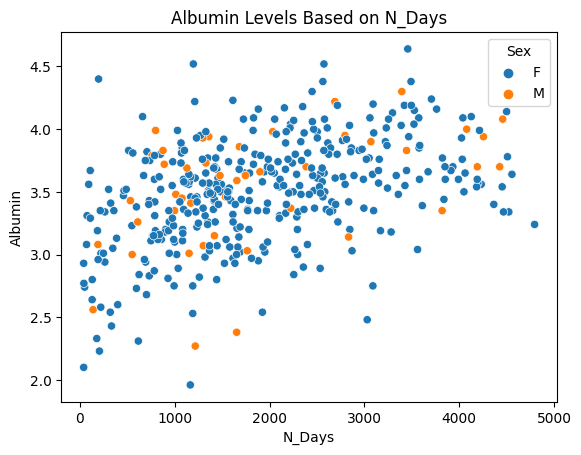

In [180]:
# Create a scatter plot to further evaluate the strongest correlation columns
ax = sns.scatterplot(data=df, x='N_Days', y='Albumin', hue='Sex')
ax.set_title("Albumin Levels Based on N_Days");

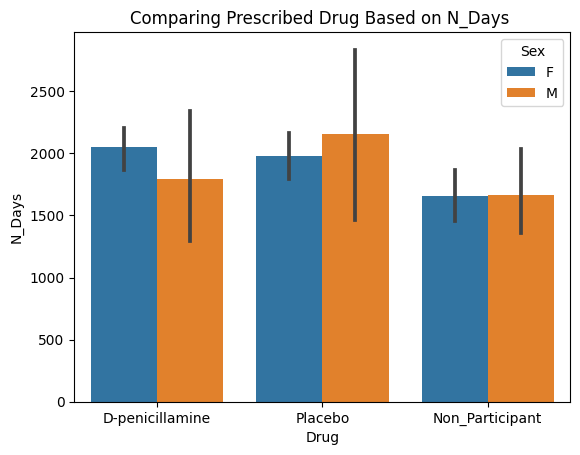

In [175]:
# Using seaborn to plot the means
ax = sns.barplot(data=df, x='Drug', y='N_Days', hue='Sex');
ax.set_title("Comparing Prescribed Drug Based on N_Days ");

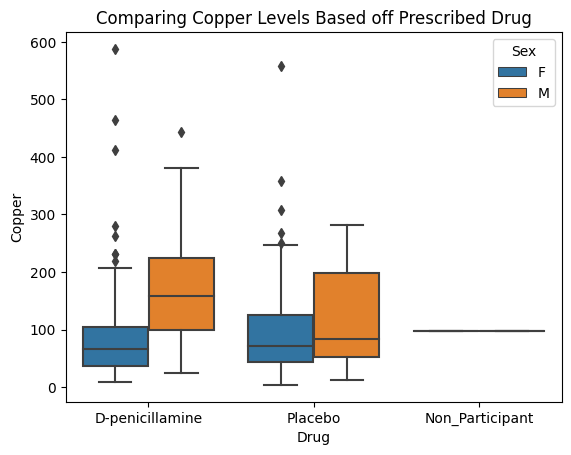

In [177]:
# Multivariate boxplot
ax = sns.boxplot(x = 'Drug', y = 'Copper', data=df, hue='Sex')
ax.set_title("Comparing Copper Levels Based off Prescribed Drug");

- Visualization Analysis:

 - Based off the box plot above, female patients that were prescribed D-penicilamine had, on average, the lowest copper levels but have the highest variety in numbers.

##Machine Learning

### Reload and Prepare the Data for Modeling

In [28]:
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,C,D-penicillamine,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,D,D-penicillamine,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,D,D-penicillamine,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,CL,Placebo,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Ascites        418 non-null    object 
 5   Hepatomegaly   418 non-null    object 
 6   Spiders        418 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          418 non-null    int64  
dtypes: float64

## Preprocessing Steps:

- The 'Status' and 'Edema' columns will be dropped as they do not serve a purpose in making predictions for the clinical trial.

#### Assign Features(X) and Target(y)

In [30]:
# Define features (X) and target(y)
X = df.drop(columns= ['Drug', 'Status', 'Edema', 'Ascites'])
y = df['Drug']

In [31]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Check Class Balance

In [32]:
# Check amount of samples
y_train.value_counts(normalize=True)

D-penicillamine    0.405751
Placebo            0.370607
Non_Participant    0.223642
Name: Drug, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

Placebo            0.361905
Non_Participant    0.342857
D-penicillamine    0.295238
Name: Drug, dtype: float64

### Column Transformers

In [34]:
# Transformers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Selectors
select_num = make_column_selector(dtype_include='number')
select_cat = make_column_selector(dtype_include='object')
# Tuples
num_tuple = (scaler, select_num)
cat_tuple = (ohe, select_cat)

In [35]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')

In [137]:
# Create a transformer pipeline
transformer = make_pipeline(preprocessor, PCA(n_components=.97))

## Models:

### KNN Model

In [138]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(transformer, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                 ('pca', PCA(n_components=0.97))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Tuning KNN Model

In [139]:
# Get parameters for KNN model
knn_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                   ('pca', PCA(n_components=0.97))])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',
       

In [140]:
# Create a dictionary of parameters
params = {'kneighborsclassifier__n_neighbors': range(1,10),
          'kneighborsclassifier__weights': ['distance', 'uniform']}

In [141]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                                        ('pca',
                                                         PCA(n_components=0.97))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 10),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [142]:
# Find the best parameters
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'uniform'}

In [143]:
# Print score of the best parameters
knn_gs.best_score_

0.6484383000512033

In [144]:
# Save best estimators to KNN model
best_knn = knn_gs.best_estimator_

In [145]:
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

### Model Evaluation:

In [146]:
# Print Classification Reports
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
                  precision    recall  f1-score   support

D-penicillamine       0.62      0.83      0.71       127
Non_Participant       1.00      1.00      1.00        70
        Placebo       0.70      0.44      0.54       116

       accuracy                           0.72       313
      macro avg       0.77      0.76      0.75       313
   weighted avg       0.73      0.72      0.71       313

Test
                  precision    recall  f1-score   support

D-penicillamine       0.49      0.77      0.60        31
Non_Participant       0.97      1.00      0.99        36
        Placebo       0.63      0.32      0.42        38

       accuracy                           0.69       105
      macro avg       0.70      0.70      0.67       105
   weighted avg       0.71      0.69      0.67       105



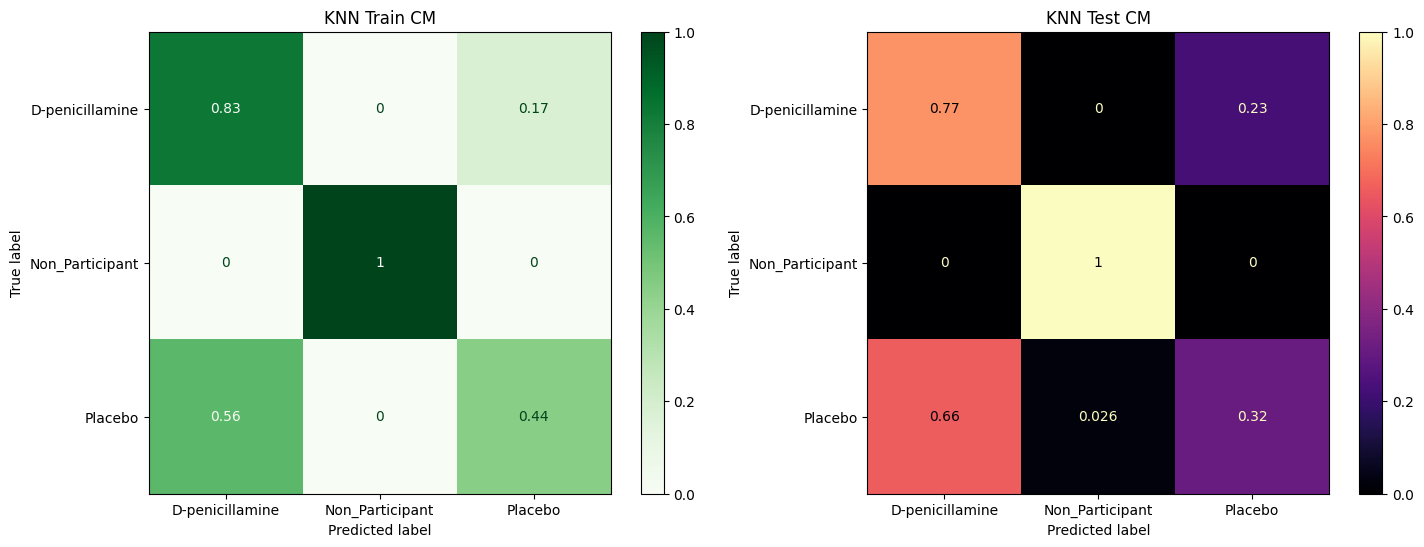

In [147]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(17,6))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Greens',normalize='true')

axes[0].set_title('KNN Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='magma',normalize='true')

axes[1].set_title('KNN Test CM');


### Decision Tree Clsssifier

In [148]:
# Create an instance of the model
dec_tree = DecisionTreeClassifier()
# Create a model pipeline
dec_tree_pipe = make_pipeline(transformer, dec_tree)
# Fit the Model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                 ('pca', PCA(n_components=0.97))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

#### Tune Model

In [149]:
# Display the hyperparameters
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                   ('pca', PCA(n_components=0.97))])),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',
   

In [150]:
# Create a dictionary of parameters
params_dec = {'decisiontreeclassifier__max_depth': [1,2,3],
              'decisiontreeclassifier__min_samples_leaf': [1,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}

In [151]:
# Tune hyperparameters with GridSearchCV
dec_grid = GridSearchCV(dec_tree_pipe, params_dec)
dec_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                                        ('pca',
                                                         PCA(n_components=0.97))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 2, 3],
                         'decisiontreeclassifier__min_samples_leaf': [1, 15,
                                                                      20],
                         'decisiontreeclassifier__min_samples_split': [2, 10,
                                                                       100]})

In [152]:
# Find the best parameters for Decision Tree
dec_grid.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [153]:
# Print score for best parameters
dec_grid.best_score_

0.5784434203789043

In [154]:
# Save best estimators to model
best_dec = dec_grid.best_estimator_

In [155]:
# Instantiate and fit GridSearchCV
dec_train_pred = best_dec.predict(X_train)
dec_test_pred = best_dec.predict(X_test)

### Model Evaluation:

In [156]:
# Print Classification Report
print('Train\n', classification_report(y_train, dec_train_pred))
print('Test\n', classification_report(y_test, dec_test_pred))

Train
                  precision    recall  f1-score   support

D-penicillamine       0.54      0.95      0.69       127
Non_Participant       0.94      0.89      0.91        70
        Placebo       0.87      0.17      0.29       116

       accuracy                           0.65       313
      macro avg       0.78      0.67      0.63       313
   weighted avg       0.75      0.65      0.59       313

Test
                  precision    recall  f1-score   support

D-penicillamine       0.40      0.87      0.55        31
Non_Participant       1.00      0.81      0.89        36
        Placebo       0.44      0.11      0.17        38

       accuracy                           0.57       105
      macro avg       0.62      0.59      0.54       105
   weighted avg       0.62      0.57      0.53       105



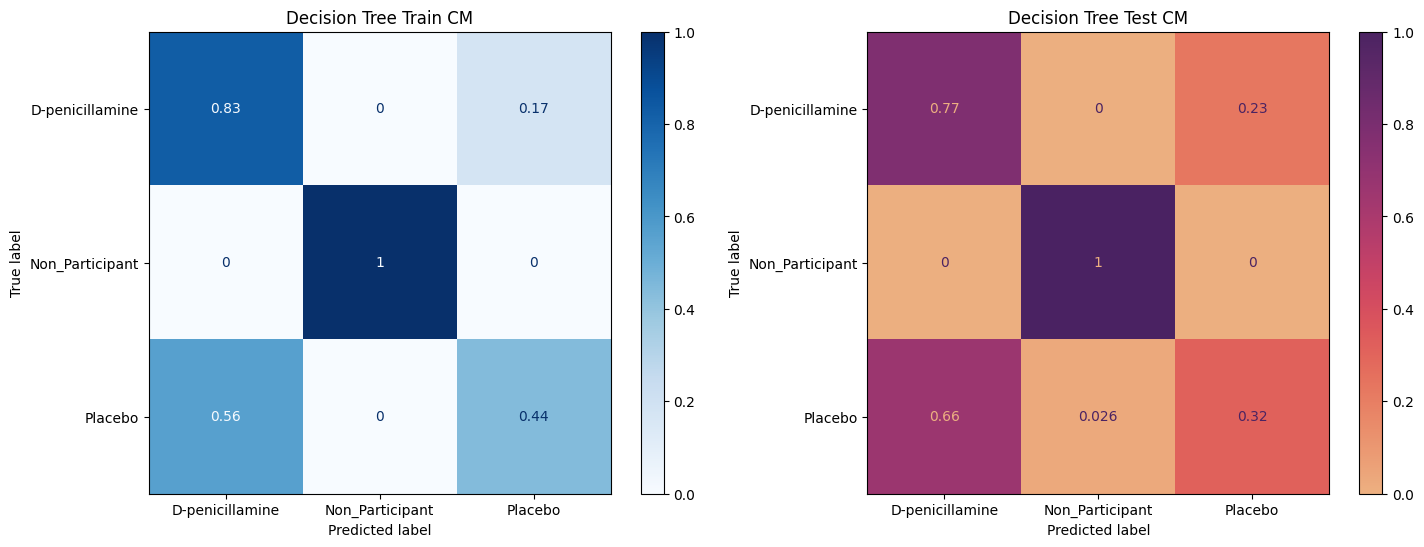

In [157]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(17,6))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Decision Tree Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='flare',normalize='true')

axes[1].set_title('Decision Tree Test CM');


### Logistic Regression Model

In [158]:
# Create an instance ofthe model
log_reg = LogisticRegression()
# Create a model pipeline
log_reg_pipe = make_pipeline(transformer, log_reg)
# Fit the Model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                 ('pca', PCA(n_components=0.97))])),
                ('logisticregression', LogisticRegression())])

In [159]:
# Use functions to display the hyperparameters
log_reg_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('standardscaler',
                                                     StandardScaler(),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                   ('pca', PCA(n_components=0.97))])),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('standardscaler',
           

In [160]:
# Find the best parameters
params_log = {'logisticregression__penalty': ['l1','l2'],
              'logisticregression__C': (-3,3,7),
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [161]:
# Tune hyperparameters with GridSearchCV
log_grid = GridSearchCV(log_reg_pipe, params_log)
log_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02fe0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2aeb02830>)])),
                                                        ('pca',
                                                         PCA(n_components=0.97))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': (-3, 3, 7),
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']})

In [162]:
# Find best parameters for the model
log_grid.best_params_

{'logisticregression__C': 3,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [163]:
# Print score for the best hyperparameters
log_grid.best_score_

0.6104454685099846

In [164]:
# Save model to best estimators
best_log_reg = log_grid.best_estimator_

In [165]:
# Instantiate and fit GridSearchCV
log_train_pred = best_log_reg.predict(X_train)
log_test_pred = best_log_reg.predict(X_test)

In [166]:
print('Train\n', classification_report(y_train, log_train_pred))
print('Test\n', classification_report(y_test, log_test_pred))

Train
                  precision    recall  f1-score   support

D-penicillamine       0.57      0.67      0.61       127
Non_Participant       1.00      1.00      1.00        70
        Placebo       0.55      0.44      0.49       116

       accuracy                           0.66       313
      macro avg       0.71      0.70      0.70       313
   weighted avg       0.66      0.66      0.65       313

Test
                  precision    recall  f1-score   support

D-penicillamine       0.40      0.45      0.42        31
Non_Participant       1.00      1.00      1.00        36
        Placebo       0.50      0.45      0.47        38

       accuracy                           0.64       105
      macro avg       0.63      0.63      0.63       105
   weighted avg       0.64      0.64      0.64       105



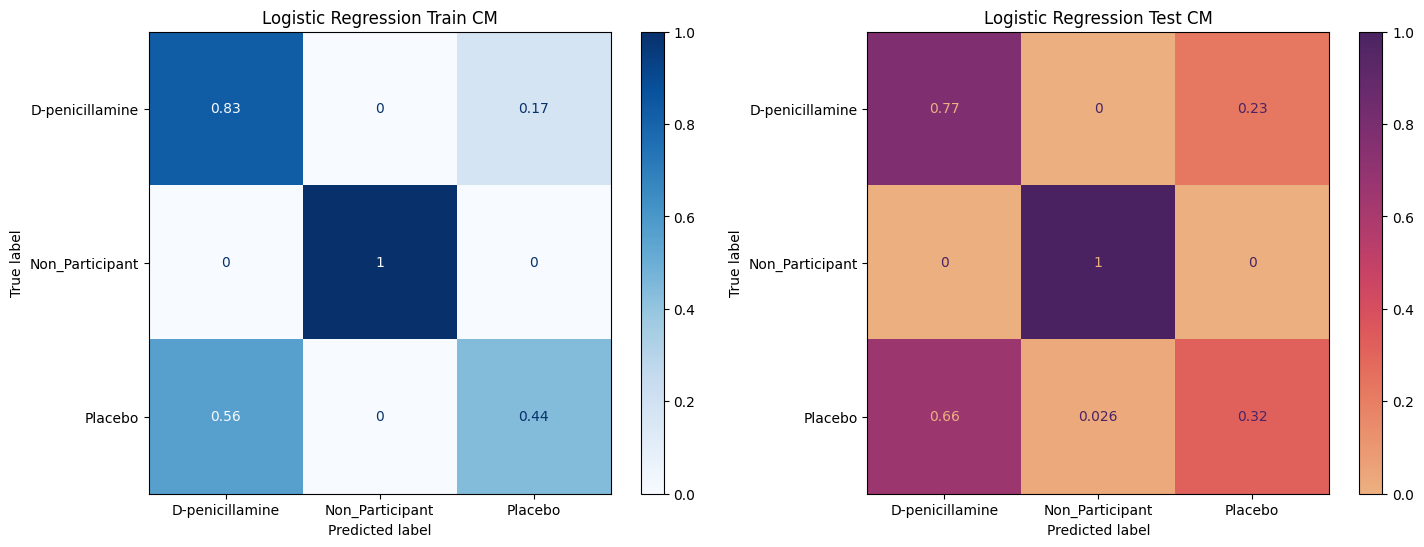

In [167]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(17,6))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Logistic Regression Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='flare',normalize='true')

axes[1].set_title('Logistic Regression Test CM');


## Analysis & Recommendations:

- The KNN tuned model would be the best model for making predictions of whether a patient was prescribed D-penicillamine, a placebo, or didn't participate in the clinical trial but provided medical information. Although the test scores fall by 3% (displayed below), both train and test metrics are higher than any of the models.

In [168]:
# Print Classification Reports
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
                  precision    recall  f1-score   support

D-penicillamine       0.62      0.83      0.71       127
Non_Participant       1.00      1.00      1.00        70
        Placebo       0.70      0.44      0.54       116

       accuracy                           0.72       313
      macro avg       0.77      0.76      0.75       313
   weighted avg       0.73      0.72      0.71       313

Test
                  precision    recall  f1-score   support

D-penicillamine       0.49      0.77      0.60        31
Non_Participant       0.97      1.00      0.99        36
        Placebo       0.63      0.32      0.42        38

       accuracy                           0.69       105
      macro avg       0.70      0.70      0.67       105
   weighted avg       0.71      0.69      0.67       105

